# Lecture : Graph SVM

## Lab 02 : Soft-Margin SVM

### Xavier Bresson  


In [1]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/My Drive/CS5284_2024_codes/codes/04_Graph_SVM'
    print(path_to_file)
    # change current path to the folder containing "path_to_file"
    os.chdir(path_to_file)
    !pwd


Mounted at /content/gdrive
/content/gdrive/My Drive/CS5284_2024/codes/04_Graph_SVM
/content/gdrive/My Drive/CS5284_2024/codes/04_Graph_SVM


In [2]:
# Load libraries
import numpy as np
import scipy.io
%matplotlib inline
#%matplotlib notebook
from matplotlib import pyplot
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from IPython.display import display, clear_output
import time
import sys; sys.path.insert(0, 'lib/')
from lib.utils import compute_purity
from lib.utils import compute_SVM
import warnings; warnings.filterwarnings("ignore")


# Linearly separable data points

In [3]:
# Data matrix X = linearly separable data points
mat = scipy.io.loadmat('datasets/data_softSVM.mat')
Xtrain = mat['Xtrain']
Cgt_train = mat['C_train_errors'] - 1; Cgt_train = Cgt_train.squeeze()
l_train = mat['l'].squeeze()
n = Xtrain.shape[0]
d = Xtrain.shape[1]
nc = len(np.unique(Cgt_train))
print(n,d,nc)
Xtest = mat['Xtest']
Cgt_test = mat['Cgt_test'] - 1; Cgt_test = Cgt_test.squeeze()


40 2 2


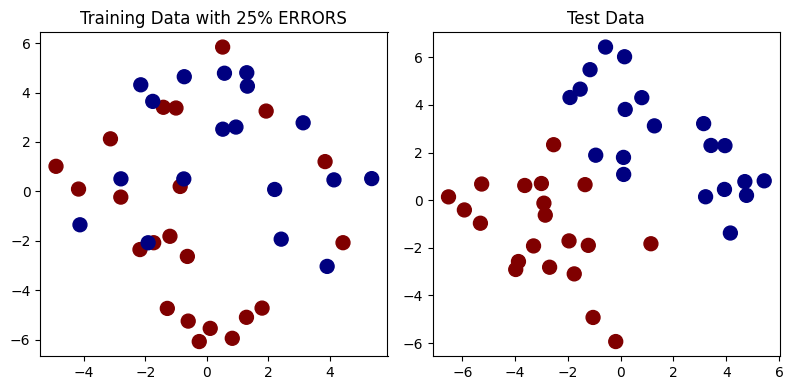

In [4]:
# Plot
plt.figure(figsize=(8,4))
p1 = plt.subplot(121)
size_vertex_plot = 100
plt.scatter(Xtrain[:,0], Xtrain[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_train, color=pyplot.jet())
plt.title('Training Data with 25% ERRORS')
p2 = plt.subplot(122)
size_vertex_plot = 100
plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_test, color=pyplot.jet())
plt.title('Test Data')
plt.tight_layout()
plt.show()


**Question 1: Evaluate the performance of soft-margin SVM on linearly separable data with different error parameters**

- How does the performance of a soft-margin SVM change on training and testing data as the error parameter increases?

(Answer -- As the error parameter increases, the SVM becomes less tolerant of misclassifications. A higher error parameter puts more emphasis on minimizing the classification errors, meaning the SVM will try harder to classify every point correctly, which could lead to overfitting. While this may improve the performance on the training set, it can reduce the model's ability to generalize to unseen data, leading to worse performance on the test set. )


In [5]:
# Error parameter
############################################################################
# Your code start
############################################################################

lamb =

############################################################################
# Your code end
############################################################################

Compute linear kernel, L, Q, time steps, initialization and projection of alpha as for linear SVM

In [6]:
# Run soft-margin SVM

# Compute linear kernel, L, Q
l = l_train

Ker = Xtrain.dot(Xtrain.T)
L = np.diag(l)
Q = L.dot(Ker.dot(L))

# Initialization
alpha = np.zeros([n])
beta = 0.0

# Time steps
tau_alpha = 10/ np.linalg.norm(Q,2)
tau_beta = 0.1/ np.linalg.norm(L,2)


**Question 2: Project** $\alpha$ **to** $[0, lamb]$ during the update of alpha and beta with conjuguate gradient

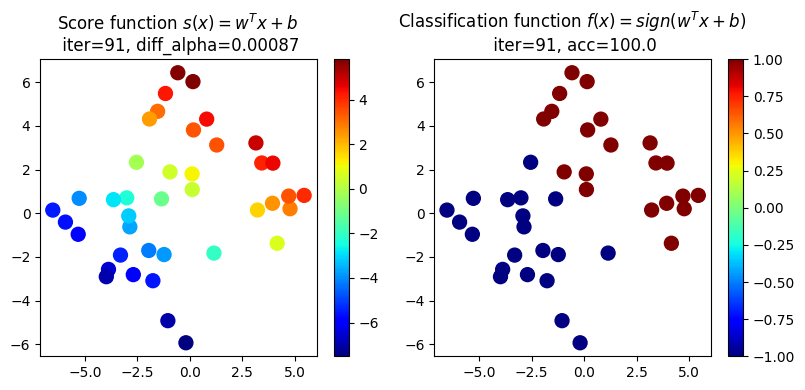

In [7]:
# For conjuguate gradient
Acg = tau_alpha* Q + np.eye(n)

# Pre-compute J.K(Xtest) for test data
LKXtest = L.dot(Xtrain.dot(Xtest.T))

# Loop
k = 0
diff_alpha = 1e6
num_iter = 201
alpha_old = alpha

while (diff_alpha>1e-3) & (k<num_iter):

    # Update iteration
    k += 1

    # Update alpha
    # Approximate solution with conjuguate gradient
    b0 = alpha + tau_alpha - tau_alpha* l* beta
    alpha, _ = scipy.sparse.linalg.cg(Acg, b0, x0=alpha, tol=1e-3, maxiter=50)

    # Projection of alpha on [0, lamb]
    ############################################################################
    # Your code start
    ############################################################################


    ############################################################################
    # Your code end
    ############################################################################

    # Update beta
    beta = beta + tau_beta* l.T.dot(alpha)

    # Stopping condition
    diff_alpha = np.linalg.norm(alpha-alpha_old)
    alpha_old = alpha

    # Plot
    if not(k%10) or (diff_alpha<1e-3):

        # Indicator function of support vectors
        idx = np.where( np.abs(alpha)>0.25* np.max(np.abs(alpha)) )
        Isv = np.zeros([n]); Isv[idx] = 1
        nb_sv = len(Isv.nonzero()[0])

        # Offset
        if nb_sv > 1:
            b = (Isv.T).dot( l - Ker.dot(L.dot(alpha)) )/ nb_sv
        else:
            b = 0

        # Continuous score function
        f_test = alpha.T.dot(LKXtest) + b

        # Binary classification function
        C_test = np.sign(f_test) # decision function in {-1,1}
        accuracy_test = compute_purity(0.5*(1+C_test),Cgt_test,nc) # 0.5*(1+C_test) in {0,1}

        # Plot
        plt.figure(figsize=(8,4))
        p1 = plt.subplot(121)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=f_test, color=pyplot.jet())
        plt.title('Score function $s(x)=w^Tx+b$ \n iter=' + str(k)+ ', diff_alpha=' + str(diff_alpha)[:7])
        plt.colorbar()
        p2 = plt.subplot(122)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=C_test, color=pyplot.jet())
        plt.title('Classification function $f(x)=sign(w^Tx+b)$\n iter=' + str(k) + ', acc=' + str(accuracy_test)[:5])
        plt.tight_layout()
        plt.colorbar()
        plt.show()
        if k<num_iter-1:
            clear_output(wait=True)


# Non-linearly separable data points

In [8]:
# Dataset
mat = scipy.io.loadmat('datasets/data_twomoons_softSVM.mat')
Xtrain = mat['Xtrain']
Cgt_train = mat['C_train_errors'] - 1; Cgt_train = Cgt_train.squeeze()
l_train = mat['l'].squeeze()
n = Xtrain.shape[0]
d = Xtrain.shape[1]
nc = len(np.unique(Cgt_train))
print(n,d,nc)
Xtest = mat['Xtest']
Cgt_test = mat['Cgt_test'] - 1; Cgt_test = Cgt_test.squeeze()


500 100 2


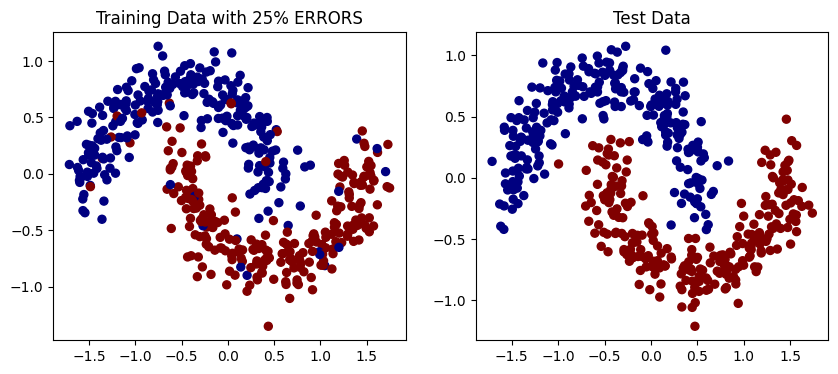

In [9]:
# Plot
plt.figure(figsize=(10,4))
p1 = plt.subplot(121)
size_vertex_plot = 33
plt.scatter(Xtrain[:,0], Xtrain[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_train, color=pyplot.jet())
plt.title('Training Data with 25% ERRORS')
p2 = plt.subplot(122)
size_vertex_plot = 33
plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=Cgt_test, color=pyplot.jet())
plt.title('Test Data')
#plt.tight_layout()
plt.show()


**Question 3: Evaluate the performance of soft-margin SVM on non-linearly separable data with different error parameters**

- Compare the results with hard-margin Linear SVM, can significant improvements in soft-margin linear SVM over hard-margin linear SVM be achieved by tuning the error parameter on non-linearly separable data?



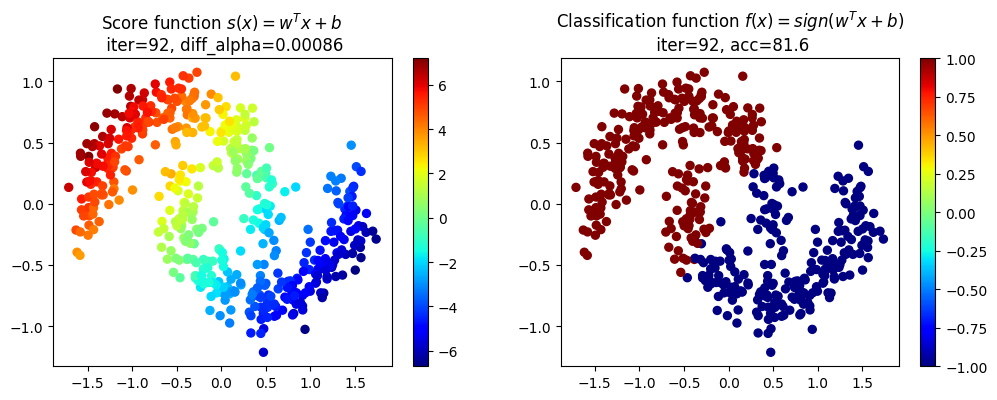

In [10]:
# Run soft-margin SVM

# Compute linear kernel, L, Q
Ker = Xtrain.dot(Xtrain.T)
l = l_train
L = np.diag(l)
Q = L.dot(Ker.dot(L))

# Time steps
tau_alpha = 10/ np.linalg.norm(Q,2)
tau_beta = 0.1/ np.linalg.norm(L,2)

# For conjuguate gradient
Acg = tau_alpha* Q + np.eye(n)

# Pre-compute J.K(Xtest) for test data
LKXtest = L.dot(Xtrain.dot(Xtest.T))

# Error parameter
############################################################################
# Your code start
############################################################################

lamb =

############################################################################
# Your code end
############################################################################

# Initialization
alpha = np.zeros([n])
beta = 0.0
alpha_old = alpha

# Loop
k = 0
diff_alpha = 1e6
num_iter = 201
while (diff_alpha>1e-3) & (k<num_iter):

    # Update iteration
    k += 1

    # Update alpha
    # Approximate solution with conjuguate gradient
    b0 = alpha + tau_alpha - tau_alpha* l* beta
    alpha, _ = scipy.sparse.linalg.cg(Acg, b0, x0=alpha, tol=1e-3, maxiter=50)
    alpha[alpha<0.0] = 0 # Projection on [0,+infty]
    alpha[alpha>lamb] = lamb # Projection on [-infty,lamb]

    # Update beta
    beta = beta + tau_beta* l.T.dot(alpha)

    # Stopping condition
    diff_alpha = np.linalg.norm(alpha-alpha_old)
    alpha_old = alpha

    # Plot
    if not(k%10) or (diff_alpha<1e-3):

        # Indicator function of support vectors
        idx = np.where( np.abs(alpha)>0.25* np.max(np.abs(alpha)) )
        Isv = np.zeros([n]); Isv[idx] = 1
        nb_sv = len(Isv.nonzero()[0])

        # Offset
        if nb_sv > 1:
            b = (Isv.T).dot( l - Ker.dot(L.dot(alpha)) )/ nb_sv
        else:
            b = 0

        # Continuous score function
        f_test = alpha.T.dot(LKXtest) + b

        # Binary classification function
        C_test = np.sign(f_test) # decision function in {-1,1}
        accuracy_test = compute_purity(0.5*(1+C_test),Cgt_test,nc) # 0.5*(1+C_test) in {0,1}

        # Plot
        size_vertex_plot = 33
        plt.figure(figsize=(12,4))
        p1 = plt.subplot(121)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=f_test, color=pyplot.jet())
        plt.title('Score function $s(x)=w^Tx+b$ \n iter=' + str(k)+ ', diff_alpha=' + str(diff_alpha)[:7])
        plt.colorbar()
        p2 = plt.subplot(122)
        plt.scatter(Xtest[:,0], Xtest[:,1], s=size_vertex_plot*np.ones(n), c=C_test, color=pyplot.jet())
        plt.title('Classification function $f(x)=sign(w^Tx+b)$\n iter=' + str(k) + ', acc=' + str(accuracy_test)[:5])
        #plt.tight_layout()
        plt.colorbar()
        plt.show()
        if k<num_iter-1:
            clear_output(wait=True)
